In [46]:
from IPython.display import clear_output
dataset = "../test/fixtures/kun{01,02,03,04,05,06,07,08,09,10,12}.txt"
print('Compiling...')
!cd ..; make dev > /dev/null 2> /dev/null
print('Calculating sequential pass...')
!../bin/pdpjes-seq {dataset} > /tmp/pdpjes-results-seq.csv
print('Calculating parallel pass...')
!../bin/pdpjes {dataset} > /tmp/pdpjes-results-parallel.csv
print('Done.')

Compiling...
Calculating sequential pass...
Calculating parallel pass...
-!- OpenMP ready. 8 CPUs available, 8 threads available on 0 available devices.
Done.lating file 11/11


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Konfigurace vizualizace dat
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
matplotlib.style.use('ggplot')
pd.options.display.max_rows = 15

original = pd.read_csv('/tmp/pdpjes-results-original.csv')
parallel = pd.read_csv('/tmp/pdpjes-results-parallel.csv')
sequential = pd.read_csv('/tmp/pdpjes-results-seq.csv')

elapsed = pd.DataFrame({
    '0 Test File': original['filename'],
    '1 Original Scheme': original['elapsed'],
    '2 Parallel Scheme': parallel['elapsed'],
    '3 Sequential Scheme': sequential['elapsed'],
    '4 Original vs Parallel': original['elapsed'] - parallel['elapsed'],
    '5 Original vs Sequential': original['elapsed'] - sequential['elapsed'],
    '6 Sequential vs Parallel': sequential['elapsed'] - parallel['elapsed']
})

print('Time')
elapsed

Time


,0 Test File,1 Original Scheme,2 Parallel Scheme,3 Sequential Scheme,4 Original vs Parallel,5 Original vs Sequential,6 Sequential vs Parallel
0,../test/fixtures/kun01.txt,0.013352,0.011271,0.027833,0.002081,-0.014481,0.016561
1,../test/fixtures/kun02.txt,0.008244,0.006524,0.017236,0.001720,-0.008992,0.010712
2,../test/fixtures/kun03.txt,1.725650,0.114201,2.541850,1.611449,-0.816200,2.427649
3,../test/fixtures/kun04.txt,0.041768,0.111828,0.052323,-0.070060,-0.010555,-0.059505
4,../test/fixtures/kun05.txt,0.033247,0.111540,0.050108,-0.078293,-0.016861,-0.061432
5,../test/fixtures/kun06.txt,0.026131,0.007449,0.031356,0.018682,-0.005225,0.023907
6,../test/fixtures/kun07.txt,0.009349,0.008738,0.016521,0.000611,-0.007172,0.007783
7,../test/fixtures/kun08.txt,2.003940,0.120953,2.555440,1.882987,-0.551500,2.434487
8,../test/fixtures/kun09.txt,0.286892,0.111185,0.367766,0.175707,-0.080874,0.256581
9,../test/fixtures/kun10.txt,7.972320,3.476740,13.682300,4.495580,-5.709980,10.205560


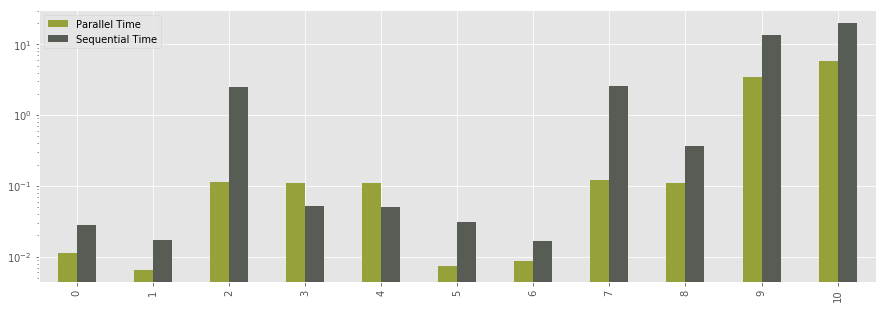

In [44]:
comparison = pd.DataFrame({
    'Sequential Time': sequential['elapsed'],
    'Parallel Time': parallel['elapsed']
})

ax = comparison.plot(kind='bar', color=['#96A13A','#575C55'])
ax.set_yscale('log', nonposy='clip')

In [37]:
iterations = pd.DataFrame({
    '0 Test File': original['filename'],
    '1 Original Scheme': original['iterations'],
    '2 Parallel Scheme': parallel['iterations'],
    '3 Sequential Scheme': sequential['iterations'],
    '4 Original vs Parallel': original['iterations'] - parallel['iterations'],
    '5 Original vs Sequential': original['iterations'] - sequential['iterations'],
    '6 Sequential vs Parallel': sequential['iterations'] - parallel['iterations']
})

print('Iterations')
iterations

Iterations


,0 Test File,1 Original Scheme,2 Parallel Scheme,3 Sequential Scheme,4 Original vs Parallel,5 Original vs Sequential,6 Sequential vs Parallel
0,../test/fixtures/kun01.txt,30574,41311,30606,-10737,-32,-10705
1,../test/fixtures/kun02.txt,19190,25168,19190,-5978,0,-5978
2,../test/fixtures/kun03.txt,2984027,506836,2984057,2477191,-30,2477221
3,../test/fixtures/kun04.txt,59563,492844,59563,-433281,0,-433281
4,../test/fixtures/kun05.txt,59563,487773,59563,-428210,0,-428210
5,../test/fixtures/kun06.txt,34853,32224,34853,2629,0,2629
6,../test/fixtures/kun07.txt,19190,30768,19190,-11578,0,-11578
7,../test/fixtures/kun08.txt,2943943,522442,2943943,2421501,0,2421501
8,../test/fixtures/kun09.txt,424752,476422,424752,-51670,0,-51670
9,../test/fixtures/kun10.txt,15544085,13885033,15544085,1659052,0,1659052


In [20]:
print(elapsed['6 Sequential vs Parallel'])
elapsed['6 Sequential vs Parallel'].mean()

0      0.016561
1      0.010712
2      2.427649
3     -0.059505
4     -0.061432
5      0.023907
6      0.007783
7      2.434487
8      0.256581
9     10.205560
10    14.444030
Name: 6 Sequential vs Parallel, dtype: float64


2.7005757800000003

In [21]:
#!rm /tmp/pdpjes*